In [98]:
import pandas as pd

In [99]:
data=pd.read_csv("uk_clocks.csv")

In [100]:
data

,id,listingIsTopRated,sellerFeedbackScore,sellerPositivePercent,sellerIsTopRated,price,endAtWeekend,endAtEvening,length,isBroken,isUsed,isLarge,freeShipping,isSold
0,2.041440e+11,0,1473,100.0,0,8.500,1,0,7,0,0,0,0,1
1,2.252300e+11,0,255,100.0,0,5.000,1,1,7,0,1,0,0,0
2,3.254140e+11,0,1465,100.0,0,2.390,1,0,7,0,0,0,0,1
3,2.659630e+11,0,1466,100.0,0,10.000,1,1,7,0,1,1,0,1
4,3.254050e+11,0,920,100.0,0,13.990,1,1,7,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,2.558150e+11,0,684,100.0,0,8.990,0,0,7,0,0,0,0,0
2859,1.657640e+11,0,464,100.0,0,20.000,1,1,7,0,1,0,0,0
2860,3.543790e+11,0,3738,100.0,0,10.990,1,1,7,0,1,0,0,0
2861,2.558140e+11,0,8528,98.9,0,41.325,1,1,5,1,0,0,0,1


In [102]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 

In [103]:
independentvariables = ['listingIsTopRated', 'sellerFeedbackScore', 'sellerPositivePercent', 'sellerIsTopRated','endAtWeekend','endAtEvening','length','isBroken','isUsed']
X = data[independentvariables] 
y = data.isSold

In [104]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=1)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [105]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)


In [106]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8055944055944056


In [107]:
from sklearn.metrics import confusion_matrix

In [108]:
confusion_matrix(y_test, y_pred)

array([[552,  53],
       [ 86,  24]])

In [109]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

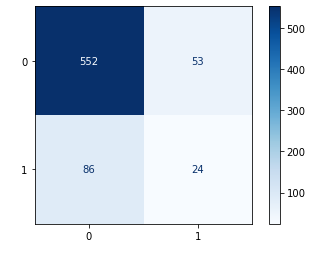

In [110]:
color = 'white'
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
plt.xlabel('Predicted isSold', color=color)
plt.ylabel('True isSold', color=color)
plt.show()


In [112]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

0.14884597268016964

In [114]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [115]:
from sklearn.ensemble import GradientBoostingClassifier

import numpy as np

import pandas as pd

from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")

In [68]:
independentvariables = ['listingIsTopRated', 'sellerFeedbackScore', 'sellerPositivePercent', 'sellerIsTopRated','endAtWeekend','endAtEvening','length','isBroken','isUsed']
X = data[independentvariables] 
y = data.isSold


In [116]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=1)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [117]:
gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5 )

In [118]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=500,
                           random_state=100)

In [119]:
print(confusion_matrix(y_test, gbc.predict(X_test)))

[[590  15]
 [ 93  17]]


In [120]:
print("GBC accuracy is %2.2f" % accuracy_score( 
     y_test, gbc.predict(X_test)))

GBC accuracy is 0.85


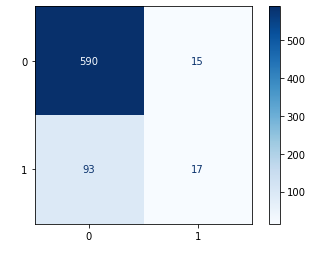

In [121]:
color = 'white'
plot_confusion_matrix(gbc, X_test, y_test, cmap=plt.cm.Blues)
plt.xlabel('Predicted isSold', color=color)
plt.ylabel('True isSold', color=color)
plt.show()


In [122]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

0.14884597268016964